In [66]:
# Machine Learning .............Simple Linear Regression.....REGRESSION (PREDICTION)

In [ ]:
# Simple Linear Regression:
In simple linear regression, we predict the output/dependent variable based on only one input feature

In [32]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [67]:
# Read the CSV File
# Importing the dataset and Extracting the Independent and Dependent variables
data = pd.read_csv('C:/Users/ADMIN/Downloads/FuelConsumptionCo2.csv')


In [43]:
companies.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [44]:
#  Select the features we want to consider in predicting values:
# Here our goal is to predict the value of “co2 emissions” from the value of “engine size” in our dataset.
# Lets select some feature to explore more

data = data[["ENGINESIZE","CO2EMISSIONS"]]

<AxesSubplot:>

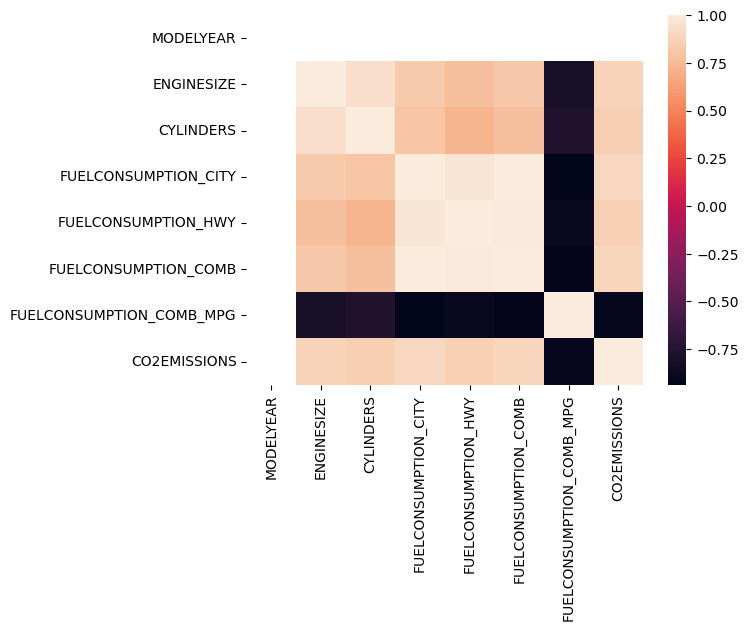

In [45]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

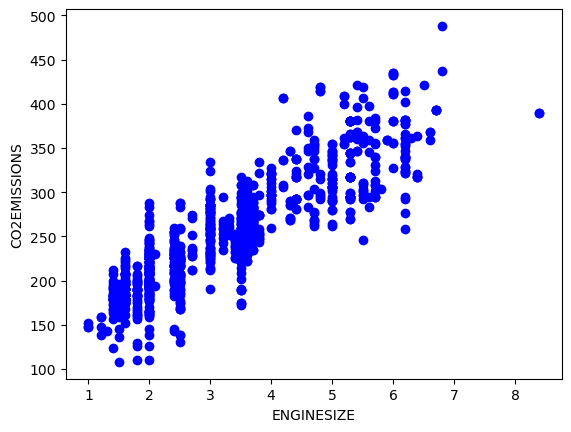

In [50]:
# Plot the Data
# We can visualize our data on a scatter plot.
# ENGINESIZE VS O2EMISSIONS
plt.scatter(data["ENGINESIZE"], data["CO2EMISSIONS"],color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [51]:
#  Divide the data into training and testing data:
# To check the accuracy of a model, we are going to divide our data into training and testing datasets. We will use training data to train our model, and then we will check the accuracy of our model using the testing dataset
# Generating training and testing data from our data:
# We are using 80% data for training

train = data[:(int((len(data)*0.8)))]
test = data[:(int((len(data)*0.8)))]

In [54]:
#Training our model:

#Train our model and find the coefficients for our best-fit regression line.

#Modeling

#Using sklearn package to model data:

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x,train_y)

# The Coffiecients:

print ("cofficients:", regr.coef_)
print ("Intercept:" , regr.intercept_)

cofficients: [[38.79512384]]
Intercept: [127.16989951]


Text(0, 0.5, 'Emission')

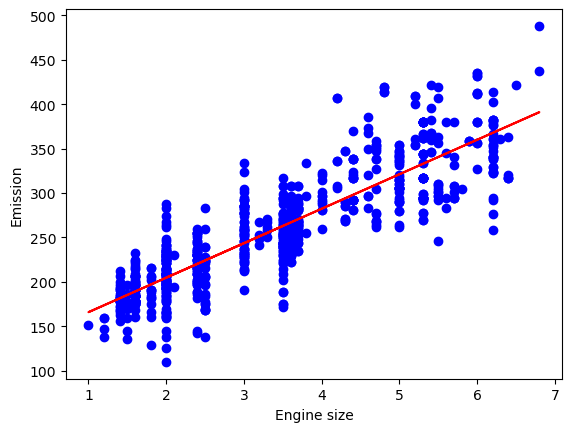

In [55]:
# Based on the coefficients, we can plot the best fit line for our dataset.

# Plotting the regression line:

plt.scatter (train["ENGINESIZE"],train["CO2EMISSIONS"],color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [56]:
# Prediction function:
# We are going to use a prediction function for our testing dataset.
# Predicting values:
# Function for predicting future values:

def get_regression_predictions(input_features,intercept,slope):
    predicted_values= input_features*slope + intercept

    return predicted_values

In [57]:
# Predicting co2 emissions based on the regression line.:
# Predicting the values of co2 emissions based on the regression line.
# Predicting emission for future car:

my_engine_size = 3.5

estimated_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission:", estimated_emission)


Estimated Emission: 262.9528329350172


In [65]:
#  Checking accuracy for test data :
# Check the accuracy of a model by comparing the actual values with the predicted values in our dataset.

# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[["ENGINESIZE"]])
test_y = np.array(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.09
Mean sum of squares (MSE): 997.45
R2-score: 0.68
